Project Title:
Flood Prediction and Early Warning System for Gujarat's Urban Areas

Problem Statement: Gujarat experiences severe flooding during monsoons, amplified by climate change, leading to loss of life, displacement, and economic damage. For instance, urban centers like Ahmedabad and Vadodara face risks from river overflows and heavy rainfall, but current warning systems often lack real-time precision, delaying evacuations and resource allocation.

Description:This project uses a dataset "Flood Risk Prediction Dataset in India" is a comprehensive dataset designed to facilitate the development and evaluation of predictive models for flood risks across various regions of India(Gujrate). The dataset includes a wide range of features encompassing meteorological, geographical, hydrological, socio-economic, and historical flood data. These features are crucial for understanding the factors that contribute to flood occurrences and for building accurate prediction models.

Load Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [3]:
# Load augmented dataset
df = pd.read_csv('flood_risk_dataset_india.csv')

In [4]:
#Display first few rows
print(df.head())

    Latitude  Longitude  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0  18.861663  78.835584     218.999493         34.144337     43.912963   
1  35.570715  77.654451      55.353599         28.778774     27.585422   
2  29.227824  73.108463     103.991908         43.934956     30.108738   
3  25.361096  85.610733     198.984191         21.569354     34.453690   
4  12.524541  81.822101     144.626803         32.635692     36.292267   

   River Discharge (m³/s)  Water Level (m)  Elevation (m)    Land Cover  \
0             4236.182888         7.415552     377.465433    Water Body   
1             2472.585219         8.811019    7330.608875        Forest   
2              977.328053         4.631799    2205.873488  Agricultural   
3             3683.208933         2.891787    2512.277800        Desert   
4             2093.390678         3.188466    2001.818223  Agricultural   

  Soil Type  Population Density  Infrastructure  Historical Floods  \
0      Clay         7276.742184   

Basic info

Data Preprocessing

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                10000 non-null  float64
 1   Longitude               10000 non-null  float64
 2   Rainfall (mm)           10000 non-null  float64
 3   Temperature (°C)        10000 non-null  float64
 4   Humidity (%)            10000 non-null  float64
 5   River Discharge (m³/s)  10000 non-null  float64
 6   Water Level (m)         10000 non-null  float64
 7   Elevation (m)           10000 non-null  float64
 8   Land Cover              10000 non-null  object 
 9   Soil Type               10000 non-null  object 
 10  Population Density      10000 non-null  float64
 11  Infrastructure          10000 non-null  int64  
 12  Historical Floods       10000 non-null  int64  
 13  Flood Occurred          10000 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memo

In [6]:
print(df.isnull().sum())

Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Land Cover                0
Soil Type                 0
Population Density        0
Infrastructure            0
Historical Floods         0
Flood Occurred            0
dtype: int64


In [7]:
print(df.describe())

           Latitude     Longitude  Rainfall (mm)  Temperature (°C)  \
count  10000.000000  10000.000000   10000.000000      10000.000000   
mean      22.330627     82.631366     150.015118         29.961401   
std        8.341274      8.389542      86.032127          8.669838   
min        8.000337     68.004575       0.014437         15.000166   
25%       15.143537     75.364428      76.124373         22.405717   
50%       22.283330     82.671007     150.620428         30.000907   
75%       29.460184     89.937897     223.402156         37.413488   
max       36.991813     96.997820     299.970293         44.993681   

       Humidity (%)  River Discharge (m³/s)  Water Level (m)  Elevation (m)  \
count  10000.000000            10000.000000     10000.000000   10000.000000   
mean      59.749104             2515.722946         5.017881    4417.138177   
std       23.142734             1441.706442         2.876579    2530.245421   
min       20.001339                0.042161         0

In [8]:
print(df.shape)

(10000, 14)


In [9]:
print(df.columns)

Index(['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)',
       'Humidity (%)', 'River Discharge (m³/s)', 'Water Level (m)',
       'Elevation (m)', 'Land Cover', 'Soil Type', 'Population Density',
       'Infrastructure', 'Historical Floods', 'Flood Occurred'],
      dtype='object')


In [10]:
# Rename columns
df = df.rename(columns={
    "Latitude": "latitude",
    "Longitude": "longitude",
    "Rainfall (mm)": "rainfall",
    "Temperature (°C)": "temperature",
    "Humidity (%)": "humidity",
    "River Discharge (m³/s)": "river_discharge",
    "Water Level (m)": "water_level",
    "Elevation (m)": "elevation",
    "Land Cover": "land_cover",
    "Soil Type": "soil_type",
    "Population Density": "population_density",
    "Infrastructure": "infrastructure",
    "Historical Floods": "historical_floods",
    "Flood Occurred": "flood_occurred"   # target column
})

# Save cleaned version
df.to_csv("flood_risk_dataset_cleaned.csv", index=False)

print("Columns renamed and saved to flood_risk_dataset_cleaned.csv")
print(df.head())


Columns renamed and saved to flood_risk_dataset_cleaned.csv
    latitude  longitude    rainfall  temperature   humidity  river_discharge  \
0  18.861663  78.835584  218.999493    34.144337  43.912963      4236.182888   
1  35.570715  77.654451   55.353599    28.778774  27.585422      2472.585219   
2  29.227824  73.108463  103.991908    43.934956  30.108738       977.328053   
3  25.361096  85.610733  198.984191    21.569354  34.453690      3683.208933   
4  12.524541  81.822101  144.626803    32.635692  36.292267      2093.390678   

   water_level    elevation    land_cover soil_type  population_density  \
0     7.415552   377.465433    Water Body      Clay         7276.742184   
1     8.811019  7330.608875        Forest      Peat         6897.736956   
2     4.631799  2205.873488  Agricultural      Loam         4361.518494   
3     2.891787  2512.277800        Desert     Sandy         6163.069701   
4     3.188466  2001.818223  Agricultural      Loam         6167.964591   

   infra

Only data on state of Gujarat

In [11]:

#Filter for Gujarat Using Latitude/Longitude
gujarat_df = df[
    (df['latitude'] >= 20.0) & (df['latitude'] <= 24.7) &
    (df['longitude'] >= 68.4) & (df['longitude'] <= 74.4)
]

In [12]:
print("Filtered Gujarat data:", gujarat_df.shape)
gujarat_df.head()

Filtered Gujarat data: (336, 14)


,latitude,longitude,rainfall,temperature,humidity,river_discharge,water_level,elevation,land_cover,soil_type,population_density,infrastructure,historical_floods,flood_occurred
18,20.526406,70.923409,179.721453,34.841212,20.712469,3038.203913,4.714103,5106.693174,Forest,Peat,1427.409995,0,0,1
39,20.764422,70.892198,13.577494,15.989522,56.491764,2240.941880,4.666739,7313.993796,Water Body,Peat,3299.939146,1,0,0
41,22.360130,72.082343,225.614078,17.490126,77.849922,3503.323335,9.432808,3729.181832,Urban,Loam,6879.586521,1,0,0
136,23.044928,71.457629,75.527640,42.226979,37.207684,1009.717102,4.336522,6775.972468,Desert,Clay,1623.784864,0,0,1
153,22.194130,69.540498,189.906366,20.805518,74.021856,1771.197538,1.790897,8544.733938,Urban,Clay,442.296537,1,1,1


In [13]:
# Check missing data
print(gujarat_df.isnull().sum())

latitude              0
longitude             0
rainfall              0
temperature           0
humidity              0
river_discharge       0
water_level           0
elevation             0
land_cover            0
soil_type             0
population_density    0
infrastructure        0
historical_floods     0
flood_occurred        0
dtype: int64


In [14]:
gujarat_df = gujarat_df.dropna(thresh=len(gujarat_df.columns) - 3)  # drop rows missing many values
gujarat_df.fillna(gujarat_df.mean(numeric_only=True), inplace=True)
#gujarat_df['soil_type'].fillna(gujarat_df['soil_type'].mode()[0], inplace=True)
gujarat_df['soil_type'] = gujarat_df['soil_type'].fillna(0)


Feature selection

In [15]:
#Select Important Feature
features =['rainfall', 'temperature', 'humidity','river_discharge', 'water_level', 'elevation', 'land_cover',
           'soil_type', 'population_density','historical_floods']

target = 'flood_occurred' # Assuming binary: 0 (no flood), 1 (flood)

X = gujarat_df[features]
y = gujarat_df[target]

In [16]:
#Rolling rainfall totals
gujarat_df['Rainfall_3d'] = gujarat_df['rainfall'].rolling(window=3).mean()


In [17]:
#River discharge to water level ratio
gujarat_df['river_ratio'] = gujarat_df['river_discharge'] / (gujarat_df['water_level'] + 1)

In [18]:
#Urbanization index
gujarat_df['urban_index'] = gujarat_df['population_density'] * gujarat_df['infrastructure']

In [19]:
# Unique categories in Land Cover
print("Unique Land Cover types:")
print(df["land_cover"].unique())

# want counts for each category
print("\nLand Cover counts:")
print(df["land_cover"].value_counts())

# Unique categories in Soil Type
print("\nUnique Soil Type types:")
print(df["soil_type"].unique())

# want counts for each category
print("\nSoil Type counts:")
print(df["soil_type"].value_counts())


Unique Land Cover types:
['Water Body' 'Forest' 'Agricultural' 'Desert' 'Urban']

Land Cover counts:
land_cover
Water Body      2046
Desert          2033
Forest          2005
Agricultural    1978
Urban           1938
Name: count, dtype: int64

Unique Soil Type types:
['Clay' 'Peat' 'Loam' 'Sandy' 'Silt']

Soil Type counts:
soil_type
Peat     2052
Silt     2044
Clay     1978
Loam     1972
Sandy    1954
Name: count, dtype: int64


In [20]:
# Generate mapping dictionaries
land_cover_map = {val: idx for idx, val in enumerate(df["land_cover"].unique())}
soil_type_map = {val: idx for idx, val in enumerate(df["soil_type"].unique())}

print("Land Cover Mapping:", land_cover_map)
print("Soil Type Mapping:", soil_type_map)

# Apply mapping to dataset
df["land_cover"] = df["land_cover"].map(land_cover_map)
df["soil_type"] = df["soil_type"].map(soil_type_map)


Land Cover Mapping: {'Water Body': 0, 'Forest': 1, 'Agricultural': 2, 'Desert': 3, 'Urban': 4}
Soil Type Mapping: {'Clay': 0, 'Peat': 1, 'Loam': 2, 'Sandy': 3, 'Silt': 4}


In [21]:
#Encode Categorical Data
label_encoders = {}
# Ensure X is defined and uses correct column names
features = ['rainfall', 'temperature', 'humidity','river_discharge', 'water_level', 'elevation', 'land_cover',
           'soil_type', 'population_density','historical_floods']
if 'X' not in locals():
    X = gujarat_df[features].copy()
for col in ['soil_type', 'land_cover']:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled shape:", X_scaled.shape)

Scaled shape: (336, 10)


In [23]:
#Save Cleaned Dataset
cleaned_df = pd.DataFrame(X_scaled, columns=features)
cleaned_df['flood_occurred'] = y.reset_index(drop=True)

# Save
cleaned_df.to_csv('gujarat_flood_cleaned.csv', index=False)
print("Cleaned dataset saved to gujarat_flood_cleaned.csv")

Cleaned dataset saved to gujarat_flood_cleaned.csv


In [24]:
# Load Cleaned Dataset gujarat_flood
df = pd.read_csv("gujarat_flood_cleaned.csv")

print("Dataset shape:", df.shape)
print("Columns:", df.columns)


Dataset shape: (336, 11)
Columns: Index(['rainfall', 'temperature', 'humidity', 'river_discharge', 'water_level',
       'elevation', 'land_cover', 'soil_type', 'population_density',
       'historical_floods', 'flood_occurred'],
      dtype='object')


In [25]:
#Split Features & Target
X = df.drop("flood_occurred", axis=1)
y = df["flood_occurred"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (336, 10)
Target shape: (336,)


In [26]:
 #Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
#Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,   # number of trees
    max_depth=15,       # limit tree depth
    random_state=42,
    class_weight="balanced"   # handles imbalance
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=200,
                       random_state=42)

In [28]:
#Evaluate
y_pred = rf_model.predict(X_test)

print("Random Forest Results:-")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Results:-
Accuracy: 0.5441176470588235

Confusion Matrix:
 [[ 9 22]
 [ 9 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.29      0.37        31
           1       0.56      0.76      0.64        37

    accuracy                           0.54        68
   macro avg       0.53      0.52      0.51        68
weighted avg       0.53      0.54      0.52        68



In [29]:
#Model Training & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train RF
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Train Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Train SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Evaluate
print("Random Forest:\n", classification_report(y_test, rf_pred))
print("Logistic Regression:\n", classification_report(y_test, lr_pred))
print("SVM:\n", classification_report(y_test, svm_pred))

# AUC scores
print("RF AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print("LR AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print("SVM AUC:", roc_auc_score(y_test, svm.predict_proba(X_test)[:,1]))


Random Forest:
               precision    recall  f1-score   support

           0       0.43      0.39      0.41        31
           1       0.53      0.57      0.55        37

    accuracy                           0.49        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.48      0.49      0.48        68

Logistic Regression:
               precision    recall  f1-score   support

           0       0.48      0.42      0.45        31
           1       0.56      0.62      0.59        37

    accuracy                           0.53        68
   macro avg       0.52      0.52      0.52        68
weighted avg       0.52      0.53      0.53        68

SVM:
               precision    recall  f1-score   support

           0       0.42      0.35      0.39        31
           1       0.52      0.59      0.56        37

    accuracy                           0.49        68
   macro avg       0.47      0.47      0.47        68
weighted avg       0.48      0

C:\Users\mistr\AppData\Local\Temp\ipykernel_364\1795931681.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


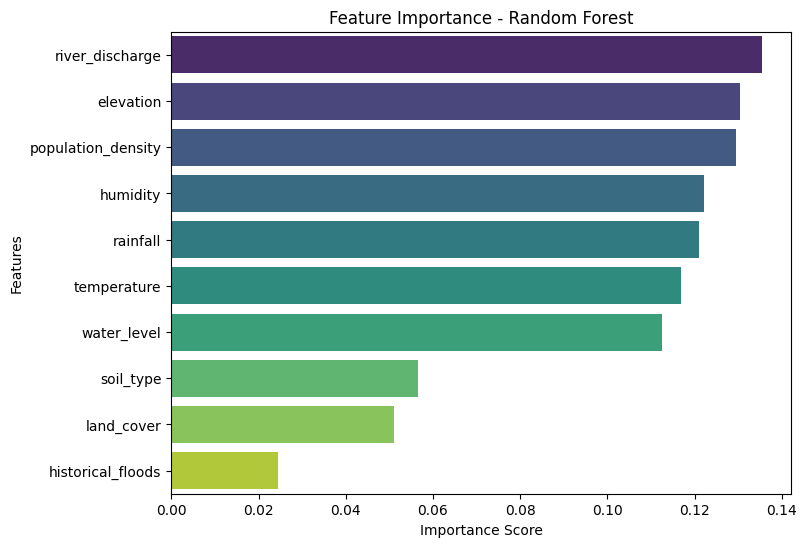

In [46]:
#Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


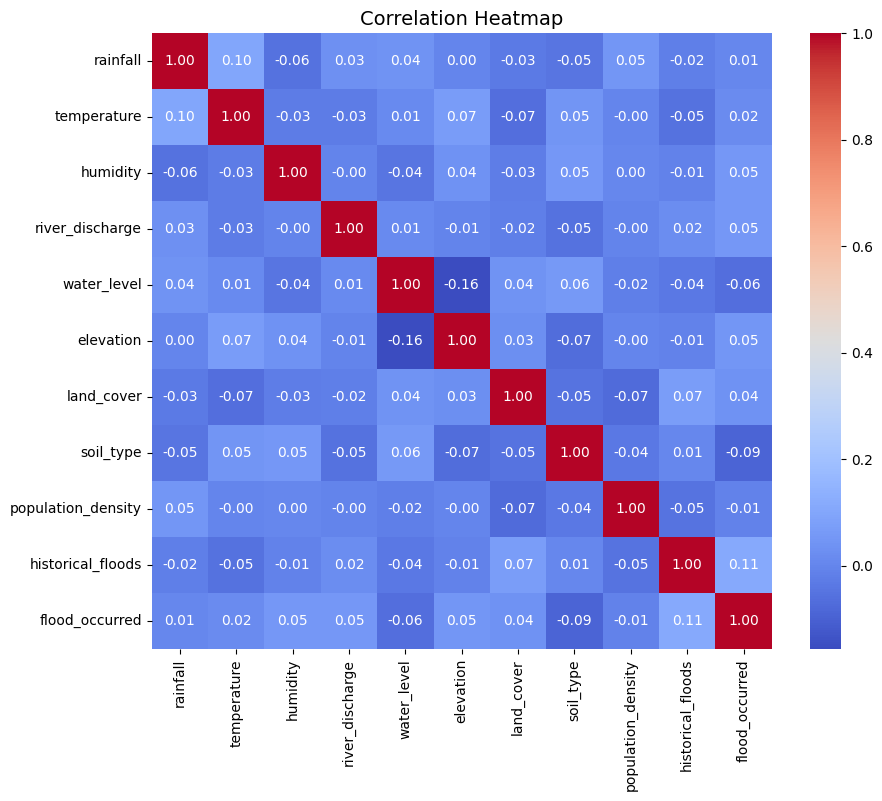

In [30]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


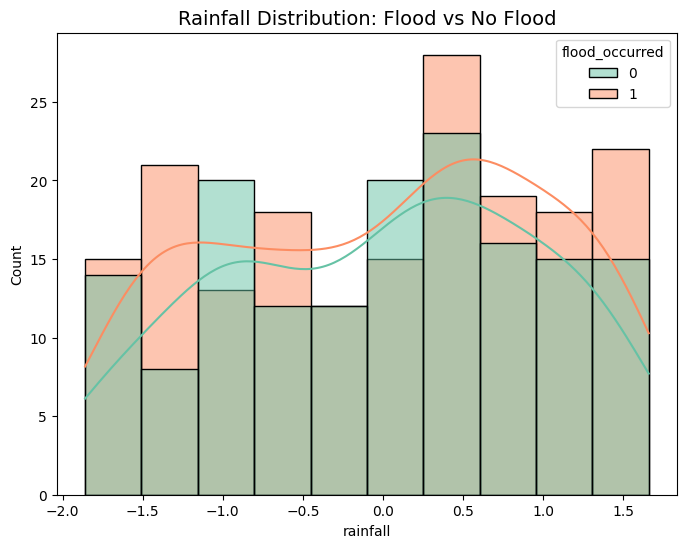

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="rainfall", hue="flood_occurred", kde=True, palette="Set2")
plt.title("Rainfall Distribution: Flood vs No Flood", fontsize=14)
plt.show()
                                                                            

In [32]:
# Create Gujarat map
import folium

map_gj = folium.Map(location=[22.3, 72.6], zoom_start=7)

for _, row in gujarat_df.iterrows():
    color = "red" if row["flood_occurred"] == 1 else "green"
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=4,
        color=color,
        fill=True,
        fill_opacity=0.6
    ).add_to(map_gj)

map_gj.save("gujarat_flood_map.html")

In [33]:
#  Save Model
joblib.dump(rf_model, "flood_rf_model.pkl")
print("Model saved as flood_rf_model.pkl")


Model saved as flood_rf_model.pkl


Deep learing: LSTM for Flood Prediction (Time-Series)

In [57]:
#Prepare Sequential Data
import numpy as np

def create_sequences(X, y, time_steps=7):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 7
X_seq, y_seq = create_sequences(X_scaled, y.values, time_steps)


In [ ]:
# Let's say want to use past 10 timesteps
timesteps = 10  

X_seq = []
y_seq = []

for i in range(timesteps, len(X)):
    X_seq.append(X[i-timesteps:i])   # last 10 timesteps of features
    y_seq.append(y[i])               # current target

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

print("X_seq shape:", X_seq.shape)  # (samples, timesteps, features)
print("y_seq shape:", y_seq.shape)


X_seq shape: (326, 10, 10)
y_seq shape: (326,)


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

model = Sequential([
    Input(shape=(X_seq.shape[1], X_seq.shape[2])),   # define input shape here
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(1, activation="sigmoid")   # output layer for flood risk (0/1)
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [60]:
#Train LSTM
history = model.fit(
    X_seq, y_seq,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    shuffle=False
)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - accuracy: 0.5401 - loss: 0.6865 - val_accuracy: 0.5455 - val_loss: 0.6859
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - accuracy: 0.5401 - loss: 0.6865 - val_accuracy: 0.5455 - val_loss: 0.6859
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5980 - loss: 0.6748 - val_accuracy: 0.5606 - val_loss: 0.6837
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5980 - loss: 0.6748 - val_accuracy: 0.5606 - val_loss: 0.6837
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5950 - loss: 0.6668 - val_accuracy: 0.5606 - val_loss: 0.6897
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5950 - loss: 0.6668 - val_accuracy: 0.5606 - val_loss: 0.6897
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5895 - loss: 0.6619 - val_accuracy: 0.5758 - val_loss: 0.7046
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5895 - loss: 0.6619 - val_accuracy: 0.5758 - val_loss: 0.704

In [62]:
#Evaluate
from sklearn.metrics import classification_report, roc_auc_score

y_pred = (model.predict(X_seq) > 0.5).astype(int)
print(classification_report(y_seq, y_pred))
print("AUC:", roc_auc_score(y_seq, y_pred))


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

           0       0.68      0.55      0.61       152
           1       0.66      0.77      0.71       174

    accuracy                           0.67       326
   macro avg       0.67      0.66      0.66       326
weighted avg       0.67      0.67      0.66       326

AUC: 0.6613732607380519
              precision    recall  f1-score   support

           0       0.68      0.55      0.61       152
           1       0.66      0.77      0.71       174

    accuracy                           0.67       326
   macro avg       0.67      0.66      0.66       326
weighted avg       0.67      0.67      0.66       326

AUC: 0.6613732607380519


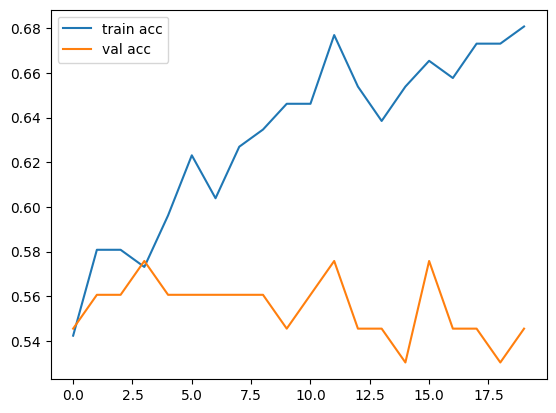

In [63]:
#Visualize Training
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.4733 - loss: 0.6965 - val_accuracy: 0.5000 - val_loss: 0.6903
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.4733 - loss: 0.6965 - val_accuracy: 0.5000 - val_loss: 0.6903
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5993 - loss: 0.6809 - val_accuracy: 0.4808 - val_loss: 0.6867
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5993 - loss: 0.6809 - val_accuracy: 0.4808 - val_loss: 0.6867
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5949 - loss: 0.6790 - val_accuracy: 0.5000 - val_loss: 0.6842
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5949 - loss: 0.6790 - val_accuracy: 0.5000 - val_loss: 0.6842
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5866 - loss: 0.6737 - val_accuracy: 0.5192 - val_loss: 0.6829
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5866 - loss: 0.6737 - val_accuracy: 0.5192 - val_loss: 0.682

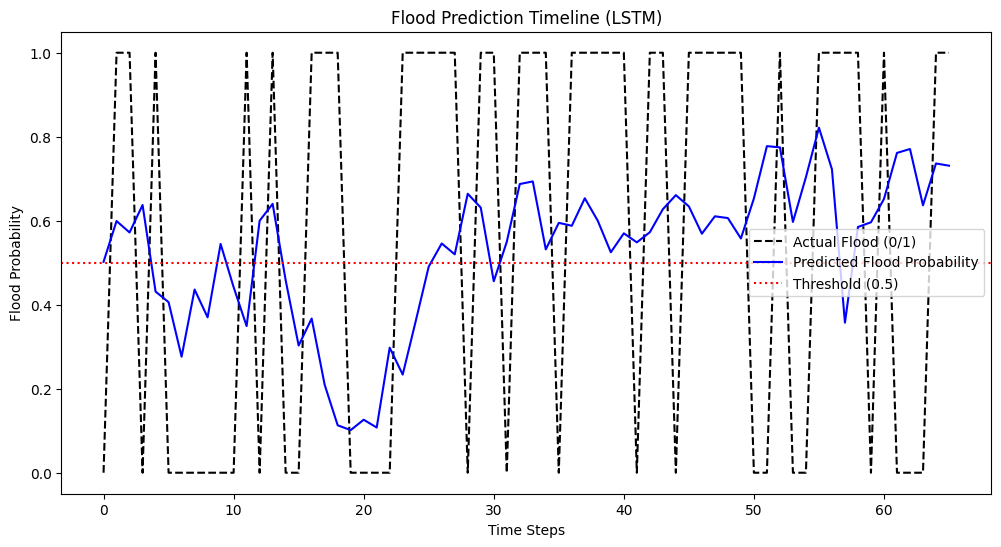

Test Accuracy: 0.5909090909090909


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

# ------------------------------
# 1. Sliding Window Preparation
# ------------------------------
def create_sequences(X, y, timesteps=10):
    X_seq, y_seq = [], []
    for i in range(timesteps, len(X)):
        X_seq.append(X[i-timesteps:i])   # last "timesteps" entries as features
        y_seq.append(y[i])               # target is current time
    return np.array(X_seq), np.array(y_seq)

# Example: Assuming X (features DataFrame) and y (labels: 0/1 flood)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   # scale features
timesteps = 10

X_seq, y_seq = create_sequences(X_scaled, y.values, timesteps=timesteps)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ------------------------------
# 2. Build LSTM Model
# ------------------------------
model = Sequential([
    Input(shape=(X_seq.shape[1], X_seq.shape[2])),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# ------------------------------
# 3. Train
# ------------------------------
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# ------------------------------
# 4. Predict on Test Set
# ------------------------------
y_pred = model.predict(X_test)

# ------------------------------
# 5. Visualization
# ------------------------------
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), y_test, label="Actual Flood (0/1)", color="black", linestyle="--")
plt.plot(range(len(y_pred)), y_pred, label="Predicted Flood Probability", color="blue")
plt.axhline(0.5, color="red", linestyle=":", label="Threshold (0.5)")
plt.xlabel("Time Steps")
plt.ylabel("Flood Probability")
plt.title("Flood Prediction Timeline (LSTM)")
plt.legend()
plt.show()

# ------------------------------
# 6. Accuracy Check
# ------------------------------
from sklearn.metrics import accuracy_score

y_pred_class = (y_pred > 0.5).astype(int)
print("Test Accuracy:", accuracy_score(y_test, y_pred_class))
